In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
!pip install citipy

In [5]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a24ac4e4a9c4dfebf3377cb440b58290


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | kurilsk
Processing Record 6 of Set 1 | te anau
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | muli
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | mozarlandia
Processing Record 14 of Set 1 | buchanan
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | gannan
Processing Record 20 of Set 1 | codrington
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | new norfolk
Processing Record

Processing Record 36 of Set 4 | khasan
Processing Record 37 of Set 4 | hervey bay
Processing Record 38 of Set 4 | arman
Processing Record 39 of Set 4 | obihiro
Processing Record 40 of Set 4 | gopalpur
Processing Record 41 of Set 4 | fort nelson
Processing Record 42 of Set 4 | ust-tsilma
Processing Record 43 of Set 4 | marostica
Processing Record 44 of Set 4 | lebu
Processing Record 45 of Set 4 | halifax
Processing Record 46 of Set 4 | dokri
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | yumen
Processing Record 49 of Set 4 | oksfjord
Processing Record 50 of Set 4 | christchurch
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | margate
Processing Record 4 of Set 5 | barbar
City not found. Skipping...
Processing Record 5 of Set 5 | kano
Processing Record 6 of Set 5 | mogadishu
Processing Record 7 of Set 5 | gat
Processing Record 8 of Set 5 | saiha
Processing Record 9 of Se

Processing Record 27 of Set 8 | saint-joseph
Processing Record 28 of Set 8 | grand gaube
Processing Record 29 of Set 8 | bosaso
Processing Record 30 of Set 8 | tilichiki
Processing Record 31 of Set 8 | naftah
City not found. Skipping...
Processing Record 32 of Set 8 | rio gallegos
Processing Record 33 of Set 8 | atar
Processing Record 34 of Set 8 | kencong
Processing Record 35 of Set 8 | purpe
Processing Record 36 of Set 8 | marquette
Processing Record 37 of Set 8 | gympie
Processing Record 38 of Set 8 | motala
Processing Record 39 of Set 8 | port hedland
Processing Record 40 of Set 8 | mocuba
Processing Record 41 of Set 8 | thayetmyo
Processing Record 42 of Set 8 | union
Processing Record 43 of Set 8 | hami
Processing Record 44 of Set 8 | boa vista
Processing Record 45 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 46 of Set 8 | skhisma
Processing Record 47 of Set 8 | brae
Processing Record 48 of Set 8 | asfi
Processing Record 49 of Set 8 | urucara
Proces

Processing Record 13 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 14 of Set 12 | pangnirtung
Processing Record 15 of Set 12 | aswan
Processing Record 16 of Set 12 | pacific grove
Processing Record 17 of Set 12 | sokolo
Processing Record 18 of Set 12 | thyolo
Processing Record 19 of Set 12 | azare
Processing Record 20 of Set 12 | turukhansk
Processing Record 21 of Set 12 | barao de melgaco
Processing Record 22 of Set 12 | andenes
Processing Record 23 of Set 12 | andros town
Processing Record 24 of Set 12 | minna
Processing Record 25 of Set 12 | rovaniemi
Processing Record 26 of Set 12 | davila
Processing Record 27 of Set 12 | sibu
Processing Record 28 of Set 12 | bafra
Processing Record 29 of Set 12 | mersin
Processing Record 30 of Set 12 | owensboro
Processing Record 31 of Set 12 | isangel
Processing Record 32 of Set 12 | tsalka
Processing Record 33 of Set 12 | manaus
Processing Record 34 of Set 12 | karatau
Processing Record 35 of Set 12 | tabialan
City not 

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,48.00,80,100,8.01,NZ,2021-01-29 01:07:00
1,Ushuaia,-54.8000,-68.3000,42.80,81,75,28.77,AR,2021-01-29 01:07:32
2,Hilo,19.7297,-155.0900,73.63,61,69,7.63,US,2021-01-29 01:05:51
3,Kurilsk,45.2333,147.8833,24.53,89,100,9.95,RU,2021-01-29 01:07:33
4,Te Anau,-45.4167,167.7167,51.85,63,81,2.48,NZ,2021-01-29 01:07:31


In [37]:
new_column_order =['City','Country','Date','Lat',
                  'Lng', 'Max Temp', 'Humidity',
                  'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

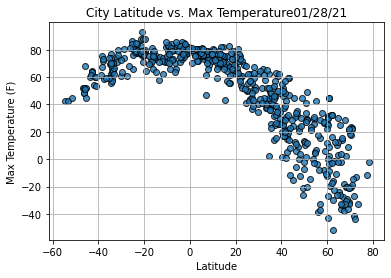

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs max. temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black" , linewidth = 1, marker ='o',
            alpha = 0.8, label = "Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

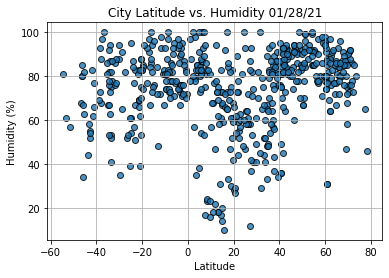

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

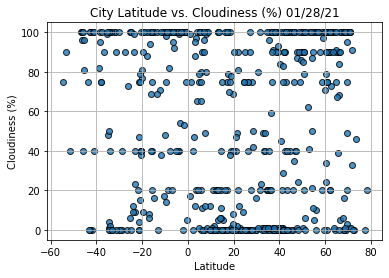

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

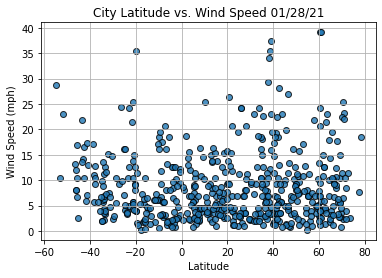

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed,edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [45]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Hilo,US,2021-01-29 01:05:51,19.7297,-155.0900,73.63,61,69,7.63
3,Kurilsk,RU,2021-01-29 01:07:33,45.2333,147.8833,24.53,89,100,9.95
5,Pevek,RU,2021-01-29 01:07:33,69.7008,170.3133,-21.06,87,100,0.85
7,Sao Filipe,CV,2021-01-29 01:07:17,14.8961,-24.4956,73.24,67,0,5.59
8,Tiksi,RU,2021-01-29 01:07:34,71.6872,128.8694,-26.68,86,91,8.43
...,...,...,...,...,...,...,...,...,...
533,Petropavlovsk-Kamchatskiy,RU,2021-01-29 01:09:55,53.0452,158.6483,21.60,92,41,10.83
534,Yangambi,CD,2021-01-29 01:09:56,0.8102,24.4336,69.98,97,99,2.08
535,Kodra,UA,2021-01-29 01:09:56,50.5949,29.5587,27.00,86,90,11.18
537,Havelock,US,2021-01-29 01:07:14,34.8791,-76.9013,36.00,64,1,10.36


In [46]:
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-01-29 01:07:00,-46.1927,168.8643,48.00,80,100,8.01
1,Ushuaia,AR,2021-01-29 01:07:32,-54.8000,-68.3000,42.80,81,75,28.77
4,Te Anau,NZ,2021-01-29 01:07:31,-45.4167,167.7167,51.85,63,81,2.48
6,Bluff,NZ,2021-01-29 01:06:12,-46.6000,168.3333,51.87,68,100,13.13
10,Kruisfontein,ZA,2021-01-29 01:07:34,-34.0033,24.7314,58.48,87,0,4.29
...,...,...,...,...,...,...,...,...,...
532,Kalabo,ZM,2021-01-29 01:09:55,-14.9700,22.6814,63.59,96,16,6.51
536,Nchelenge,ZM,2021-01-29 01:09:56,-9.3451,28.7340,70.43,81,100,3.22
538,Tsumeb,NA,2021-01-29 01:09:57,-19.2333,17.7167,64.40,94,100,1.14
539,Mpanda,TZ,2021-01-29 01:09:57,-6.3655,31.0409,63.68,93,100,1.74


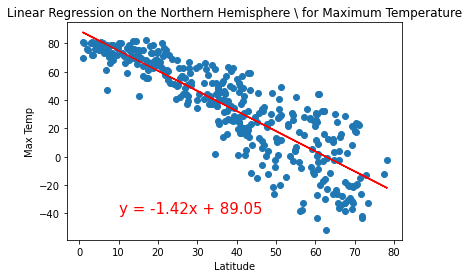

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for Maximum Temperature',
                      'Max Temp', (10,-40))

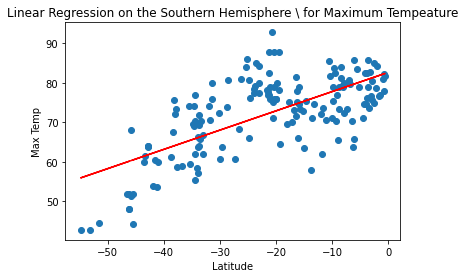

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Maximum Tempeature',
                       'Max Temp',(-50,40))

In [49]:
linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

LinregressResult(slope=0.48700575740436436, intercept=82.63501834275844, rvalue=0.6795431574015819, pvalue=1.475975627710881e-23, stderr=0.04130854546696396)

In [50]:
linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

LinregressResult(slope=-1.41978743977064, intercept=89.05316310936827, rvalue=-0.8694684293230077, pvalue=3.250640503511581e-117, stderr=0.04159991466664538)

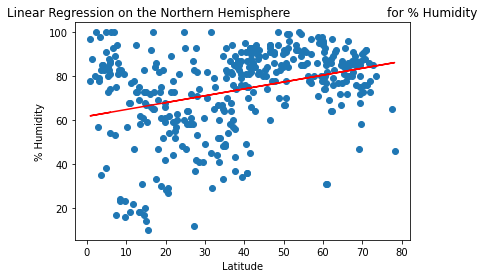

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(0,0))

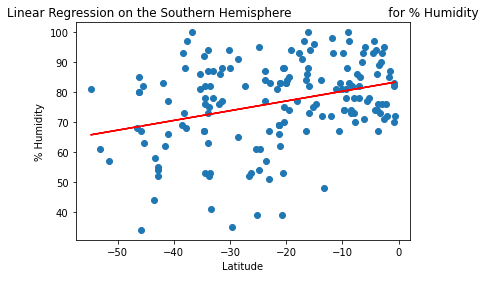

In [52]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

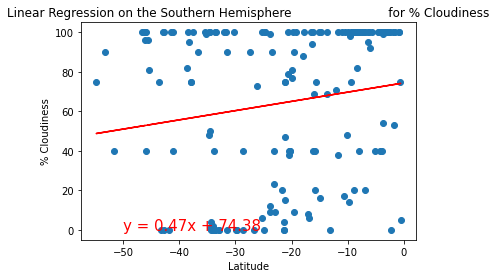

In [53]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,0))

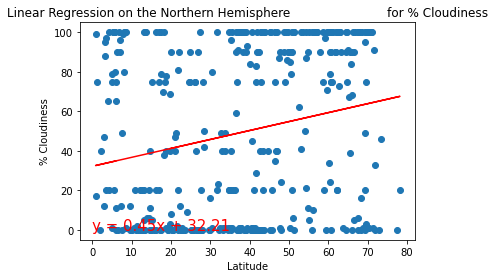

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,0))

In [55]:
linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

LinregressResult(slope=0.45209018072626495, intercept=32.209417224733485, rvalue=0.22073914685393464, pvalue=1.4844354258864824e-05, stderr=0.1030159941316896)

In [56]:
linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

LinregressResult(slope=0.4676315764947682, intercept=74.3808001854408, rvalue=0.16513160962633822, pvalue=0.034594770162105826, stderr=0.21943839031603038)

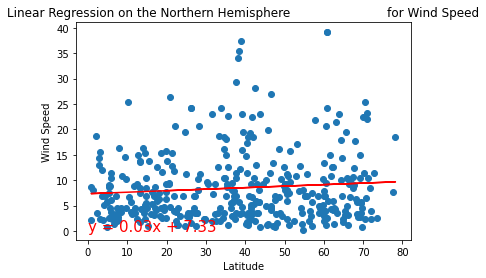

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(0,0))

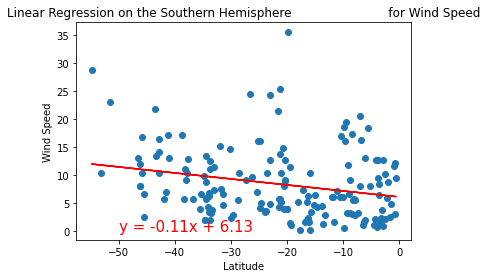

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,0))

In [59]:
!pip install gmaps

In [60]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [72]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv('weather_data/cities.csv')
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Mataura,NZ,2021-01-29 01:07:00,-46.1927,168.8643,48.00,80,100,8.01
1,1,Ushuaia,AR,2021-01-29 01:07:32,-54.8000,-68.3000,42.80,81,75,28.77
2,2,Hilo,US,2021-01-29 01:05:51,19.7297,-155.0900,73.63,61,69,7.63
3,3,Kurilsk,RU,2021-01-29 01:07:33,45.2333,147.8833,24.53,89,100,9.95
4,4,Te Anau,NZ,2021-01-29 01:07:31,-45.4167,167.7167,51.85,63,81,2.48
5,5,Pevek,RU,2021-01-29 01:07:33,69.7008,170.3133,-21.06,87,100,0.85
6,6,Bluff,NZ,2021-01-29 01:06:12,-46.6000,168.3333,51.87,68,100,13.13
7,7,Sao Filipe,CV,2021-01-29 01:07:17,14.8961,-24.4956,73.24,67,0,5.59
8,8,Tiksi,RU,2021-01-29 01:07:34,71.6872,128.8694,-26.68,86,91,8.43
9,9,Muli,MV,2021-01-29 01:07:34,2.9167,73.5667,80.47,79,12,14.32


In [62]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [69]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [84]:
# 6.5.2
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [85]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [88]:
# Heatmap of percent Cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [89]:
# Heatmap of Wind Speed
locations = city_data_df[["Lat", "Lng"]]
windspeed = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=windspeed, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [91]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [108]:
# Filter the data set to find the cities that fit the criteria
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"]<= max_temp) & \
                                      (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
9,9,Muli,MV,2021-01-29 01:07:34,2.9167,73.5667,80.47,79,12,14.32
11,11,Mozarlandia,BR,2021-01-29 01:07:35,-14.7447,-50.5706,75.31,76,100,4.25
12,12,Buchanan,LR,2021-01-29 01:07:35,5.8808,-10.0467,78.21,86,0,6.08
14,14,Butaritari,KI,2021-01-29 01:07:35,3.0707,172.7902,80.78,78,88,15.48
18,18,Codrington,AU,2021-01-29 01:07:36,-38.2667,141.9667,75.54,73,95,11.10
25,25,Atuona,PF,2021-01-29 01:07:38,-9.8000,-139.0333,78.94,74,14,18.59
28,28,Vaini,TO,2021-01-29 01:07:39,-21.2000,-175.2000,82.40,83,75,25.32
32,32,Rikitea,PF,2021-01-29 01:07:40,-23.1203,-134.9692,79.93,67,23,4.90
39,39,Kalianget,ID,2021-01-29 01:07:41,-7.0500,113.9333,80.10,82,100,20.65
41,41,Avarua,CK,2021-01-29 01:07:10,-21.2078,-159.7750,87.80,66,47,13.80


In [109]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City","Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
9,Muli,MV,80.47,2.9167,73.5667,
11,Mozarlandia,BR,75.31,-14.7447,-50.5706,
12,Buchanan,LR,78.21,5.8808,-10.0467,
14,Butaritari,KI,80.78,3.0707,172.7902,
18,Codrington,AU,75.54,-38.2667,141.9667,
25,Atuona,PF,78.94,-9.8000,-139.0333,
28,Vaini,TO,82.40,-21.2000,-175.2000,
32,Rikitea,PF,79.93,-23.1203,-134.9692,
39,Kalianget,ID,80.10,-7.0500,113.9333,
41,Avarua,CK,87.80,-21.2078,-159.7750,


In [96]:
# Dependencies and Set up
import requests
import gmaps
from config import g_key
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use the base URL to search for hotels in Paris
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params = params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'ATtYBwK8gJa5H-OVvUT6yesGceFdOfb7aR165AOG4xEkD8CpKxL7xBnElT0Rd5epbmTU1u9Yi5jQz6ddkCjthVhMLzLIlQmBMwL5JkA7O7BQp7fp1Co9hlPLV1Fc8EsvjGjiDd7y-xZzO1ZHqFJL-6LRWcf95zPJqoaJRiMPX12y_XcL8jM-tHoAIwDCA6mLuWsbZpcimzt9TI_8UgJ0Cx4LB8xWSM_2MVInTGua3NBOupGQS8YdZ_s4x5kPxfrQXQV0RGJFMpXBVEq-OzMbcgHPD15YtuPFUkueS6bsRUd9qrYW0nfI6BM_exFWKqAozzxI3ksFSidQxj1f9MYQtmiv25693g-XQNvaQGhdRAdjDjugqW0mx2OCg1D9-uClKszyBJCNiP1iMZN5icawpp1jTzjtSMuq6BS0bXHToAvDstJHSTyvEBzNJokV',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594393802915,
      'lng': 2.354352980291503},
     'southwest': {'lat': 48.8567414197085, 'lng': 2.351655019708499}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'name': 'Hôtel Duo',
   'opening_hours': {'open_now': True},
   'photos': [{'height': 3840,
     'html_attributions': ['<a href="https://

In [97]:
len(hotels['results'])

20

In [110]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [111]:
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
9,Muli,MV,80.47,2.9167,73.5667,Medhufushi Island Resort
11,Mozarlandia,BR,75.31,-14.7447,-50.5706,Hotel Santa Mônica
12,Buchanan,LR,78.21,5.8808,-10.0467,Kamaneahn Hotel Inc
14,Butaritari,KI,80.78,3.0707,172.7902,Isles Sunset Lodge
18,Codrington,AU,75.54,-38.2667,141.9667,Codrington Gardens Bed And Breakfast
...,...,...,...,...,...,...
521,Minna,NG,76.93,9.6139,6.5569,Royal Park hotel & suites
524,Sibu,MY,75.20,2.3000,111.8167,RH HOTEL (4 Star)
528,Isangel,VU,87.80,-19.5500,169.2667,Volcano Sea View Tree House
530,Manaus,BR,76.66,-3.1019,-60.0250,Hotel do Largo


In [114]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [115]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [116]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [117]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))